**Logistic Regression**

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns

In [33]:
data=pd.read_csv('/content/accident.csv')

In [34]:
data.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [35]:
data.isnull().sum()

,0
Age,0
Gender,1
Speed_of_Impact,3
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [36]:
data['Gender'].fillna(data['Gender'].mode(),inplace=True)
data['Gender']=LabelEncoder().fit_transform(data['Gender'])
data['Helmet_Used']=LabelEncoder().fit_transform(data['Helmet_Used'])
data['Seatbelt_Used']=LabelEncoder().fit_transform(data['Seatbelt_Used'])

<ipython-input-36-cc0d2804cd60>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode(),inplace=True)


(array([19., 21., 24., 14., 16., 24., 27.,  5., 16., 31.]),
 array([ 20. ,  29.9,  39.8,  49.7,  59.6,  69.5,  79.4,  89.3,  99.2,
        109.1, 119. ]),
 <BarContainer object of 10 artists>)

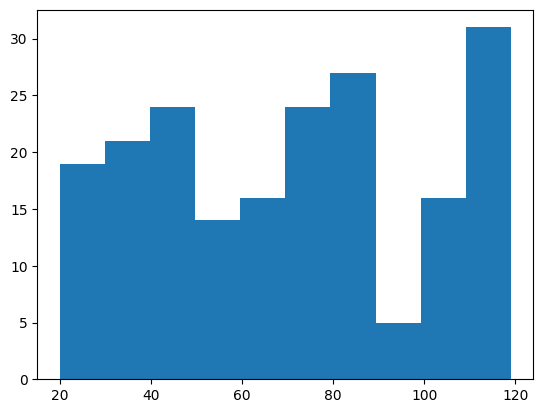

In [37]:
plt.hist(data['Speed_of_Impact'])

In [38]:
data['Speed_of_Impact'].fillna(data['Speed_of_Impact'].mean(),inplace=True)

<ipython-input-38-67b5f2215b23>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Speed_of_Impact'].fillna(data['Speed_of_Impact'].mean(),inplace=True)


In [39]:
X=data.drop(columns=['Survived'])
y=data['Survived']

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [52]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_pred,y_test)*100:.2f}%")

Accuracy Score: 61.67%


2.Develop the cost function to determine gradient descent for logistic regression.

In [70]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function for logistic regression
def cost_function(X, y, theta):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

# Gradient of the cost function
def gradient(X, y, theta):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    grad = (1/m) * np.dot(X.T, (predictions - y))
    return grad

# Gradient Descent function
def gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = []

    for _ in range(iterations):
        grad = gradient(X, y, theta)
        theta = theta - learning_rate * grad
        cost = cost_function(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

3.Generate a confusion matrix and heatmap. Compute performance metrics for your model.

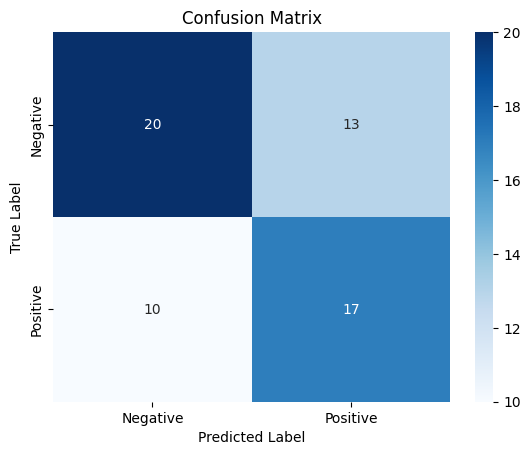

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.61      0.63        33
           1       0.57      0.63      0.60        27

    accuracy                           0.62        60
   macro avg       0.62      0.62      0.62        60
weighted avg       0.62      0.62      0.62        60



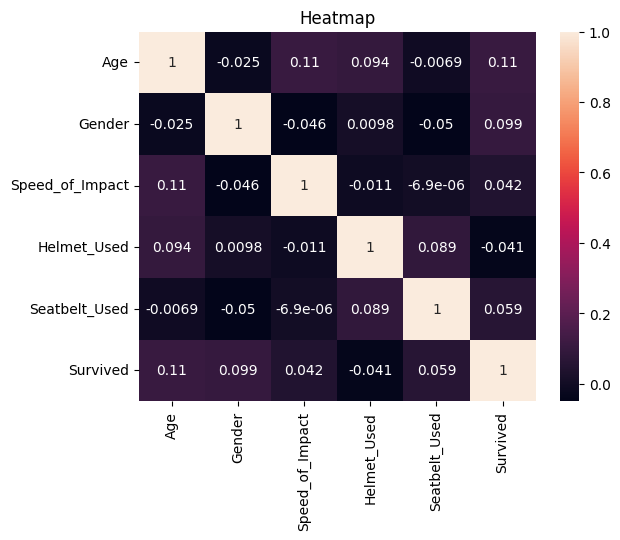

In [85]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
cf=classification_report(y_test,y_pred)
print("Classification report:")
print(cf)
c = data.corr()
sns.heatmap(c,annot=True)
plt.title('Heatmap')
plt.show()